# Project4 

Team member: Dengyi Liu, Xin Xiang, Yuchen Wang

## Import necessary libraries

In [225]:
import pandas as pd
import numpy as np

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    BaggingRegressor,
    RandomForestRegressor,
    GradientBoostingRegressor,
    AdaBoostRegressor,
    StackingRegressor,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
)
import scipy.stats as stats

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import warnings

warnings.filterwarnings("ignore")

## Import dataset from Github

In [115]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/ycwang15/Analytics_Programming/Data/Project%204%20DATA.csv"
)
df.head()

,Diagnosis,Age,Gender,PainType,BloodPres,Chol,FBSugar,RestECG,MaxHeartRate,ExAngina,STPeakSlope
0,0,63,1,1,145,233,1,2,150,0,3
1,2,67,1,4,160,286,0,2,108,1,2
2,1,67,1,4,120,229,0,2,129,1,2
3,0,37,1,3,130,250,0,0,187,0,3
4,0,41,0,2,130,204,0,2,172,0,1


In [116]:
df_copy = df.copy()

Data Overview

In [117]:
df.shape

(303, 11)

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Diagnosis     303 non-null    int64
 1   Age           303 non-null    int64
 2   Gender        303 non-null    int64
 3   PainType      303 non-null    int64
 4   BloodPres     303 non-null    int64
 5   Chol          303 non-null    int64
 6   FBSugar       303 non-null    int64
 7   RestECG       303 non-null    int64
 8   MaxHeartRate  303 non-null    int64
 9   ExAngina      303 non-null    int64
 10  STPeakSlope   303 non-null    int64
dtypes: int64(11)
memory usage: 26.2 KB


In [119]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Diagnosis,303.0,0.937294,1.228536,0.0,0.0,0.0,2.0,4.0
Age,303.0,54.438944,9.038662,29.0,48.0,56.0,61.0,77.0
Gender,303.0,0.679868,0.467299,0.0,0.0,1.0,1.0,1.0
PainType,303.0,3.158416,0.960126,1.0,3.0,3.0,4.0,4.0
BloodPres,303.0,131.689769,17.599748,94.0,120.0,130.0,140.0,200.0
Chol,303.0,246.693069,51.776918,126.0,211.0,241.0,275.0,564.0
FBSugar,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
RestECG,303.0,0.990099,0.994971,0.0,0.0,1.0,2.0,2.0
MaxHeartRate,303.0,149.607261,22.875003,71.0,133.5,153.0,166.0,202.0
ExAngina,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0


In [120]:
df.isnull().sum()

Diagnosis       0
Age             0
Gender          0
PainType        0
BloodPres       0
Chol            0
FBSugar         0
RestECG         0
MaxHeartRate    0
ExAngina        0
STPeakSlope     0
dtype: int64

In [121]:
df.duplicated().sum()

0



*   There are 303 rows and 11 columns in this dataset.
*   No missing values and duplicated values here which is a good news.
*   The data type of all of the columns are the "int64", we will convert some of them into appropriate type.





## Feature Engineering

* Convert certain columns from int to object.
* Replace the number in PainType and STeakSlope with appropriate object.
* Combine different number into one number, for example, both '1' and '2' in the column Diagnosis indicate the people has the heart disease, so we will replace 2 with 1, and the same situation in the column 'RestECG'.

### Convert the column PainType and STPeakSlope from int64 to object, and then using appropriate string to replace the each number.

In [122]:
df[['PainType','STPeakSlope']] = df[['PainType','STPeakSlope']].astype(str) 

In [123]:
df['PainType'] = df['PainType'].replace(str(1),'Typical Angina')
df['PainType'] = df['PainType'].replace(str(2),'atypical angina')
df['PainType'] = df['PainType'].replace(str(3),'nonanginal pain')
df['PainType'] = df['PainType'].replace(str(4),'asymptomatic')
df['PainType'].unique()

array(['Typical Angina', 'asymptomatic', 'non\x02anginal pain',
       'atypical angina'], dtype=object)

In [124]:
df['STPeakSlope'] = df['STPeakSlope'].replace(str(1),'upsloping')
df['STPeakSlope'] = df['STPeakSlope'].replace(str(2),'flat')
df['STPeakSlope'] = df['STPeakSlope'].replace(str(3),'downsloping')
df['STPeakSlope'].unique()

array(['downsloping', 'flat', 'upsloping'], dtype=object)

### Check the unique number in the column RestECG and Diagnosis.

In [125]:
df['RestECG'].value_counts()

0    151
2    148
1      4
Name: RestECG, dtype: int64

In [126]:
df['Diagnosis'].value_counts()

0    164
1     55
2     36
3     35
4     13
Name: Diagnosis, dtype: int64

### Change all numbers that greater than 1 into 1 in Diagnosis and RestECG column.

In [144]:
df['RestECG'] = df['RestECG'].replace(2,1)
df = df.replace({'Diagnosis' : { 2 : 1, 3 : 1, 4 : 1 }})
df.head()

,Diagnosis,Age,Gender,PainType,BloodPres,Chol,FBSugar,RestECG,MaxHeartRate,ExAngina,STPeakSlope
0,0,63,1,Typical Angina,145,233,1,1,150,0,downsloping
1,1,67,1,asymptomatic,160,286,0,1,108,1,flat
2,1,67,1,asymptomatic,120,229,0,1,129,1,flat
3,0,37,1,nonanginal pain,130,250,0,0,187,0,downsloping
4,0,41,0,atypical angina,130,204,0,1,172,0,upsloping


### EDA 

## 1.Univariate Analysis

#### 1.1 Check the count plot for each categorical column.

In [128]:
cat_col = df[['Diagnosis','Gender','PainType','FBSugar','RestECG','ExAngina','STPeakSlope']].columns.to_list()
cat_col

['Diagnosis',
 'Gender',
 'PainType',
 'FBSugar',
 'RestECG',
 'ExAngina',
 'STPeakSlope']

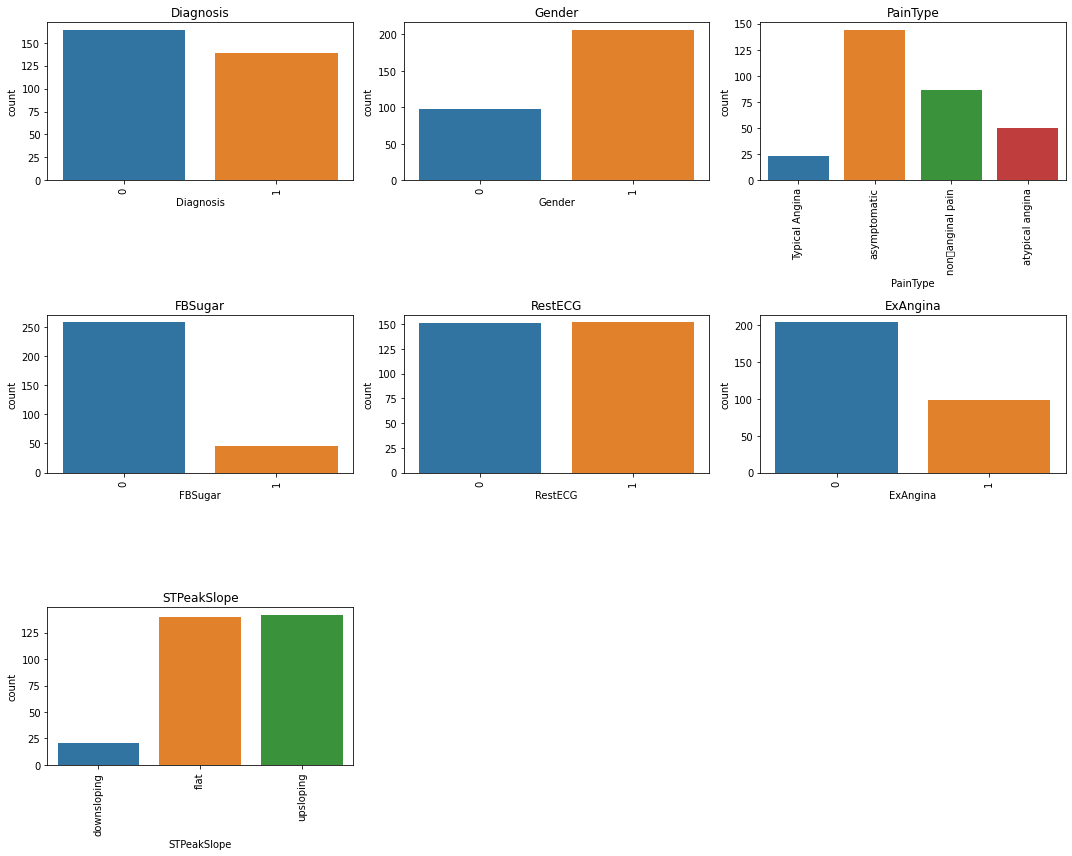

In [145]:
plt.figure(figsize=(15, 12))
for i, j in enumerate(cat_col):
    plt.subplot(3, 3, i + 1)
    sns.countplot(df[j])
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.title(j)

plt.show()

In [146]:
for i in cat_col:
  print(df[i].value_counts(normalize = True))
  print("-" * 50)

0    0.541254
1    0.458746
Name: Diagnosis, dtype: float64
--------------------------------------------------
1    0.679868
0    0.320132
Name: Gender, dtype: float64
--------------------------------------------------
asymptomatic        0.475248
nonanginal pain    0.283828
atypical angina     0.165017
Typical Angina      0.075908
Name: PainType, dtype: float64
--------------------------------------------------
0    0.851485
1    0.148515
Name: FBSugar, dtype: float64
--------------------------------------------------
1    0.50165
0    0.49835
Name: RestECG, dtype: float64
--------------------------------------------------
0    0.673267
1    0.326733
Name: ExAngina, dtype: float64
--------------------------------------------------
upsloping      0.468647
flat           0.462046
downsloping    0.069307
Name: STPeakSlope, dtype: float64
--------------------------------------------------


**Observations**
* Over half of the people got the heart disease.
* Nearly 70% of people in this dataset are male.
* asymptomatic is the most common pain type which over47%, followed by nonanginal pain.
* And over 85% people fasting blood sugar > 120 mg/dl.
* Half of Resting echocardiogram are normal and half are abnormal.
* Over 2/3 of people induced angina present.
* Upsloping and flat are the two most common slope of peak exercise which around 46%, and downsloping only has 6.9% of people.

#### 1.2 Check the histogram for each continuous column

In [147]:
distribution_col = df[['Age','BloodPres','Chol','MaxHeartRate']].columns.to_list()
distribution_col

['Age', 'BloodPres', 'Chol', 'MaxHeartRate']

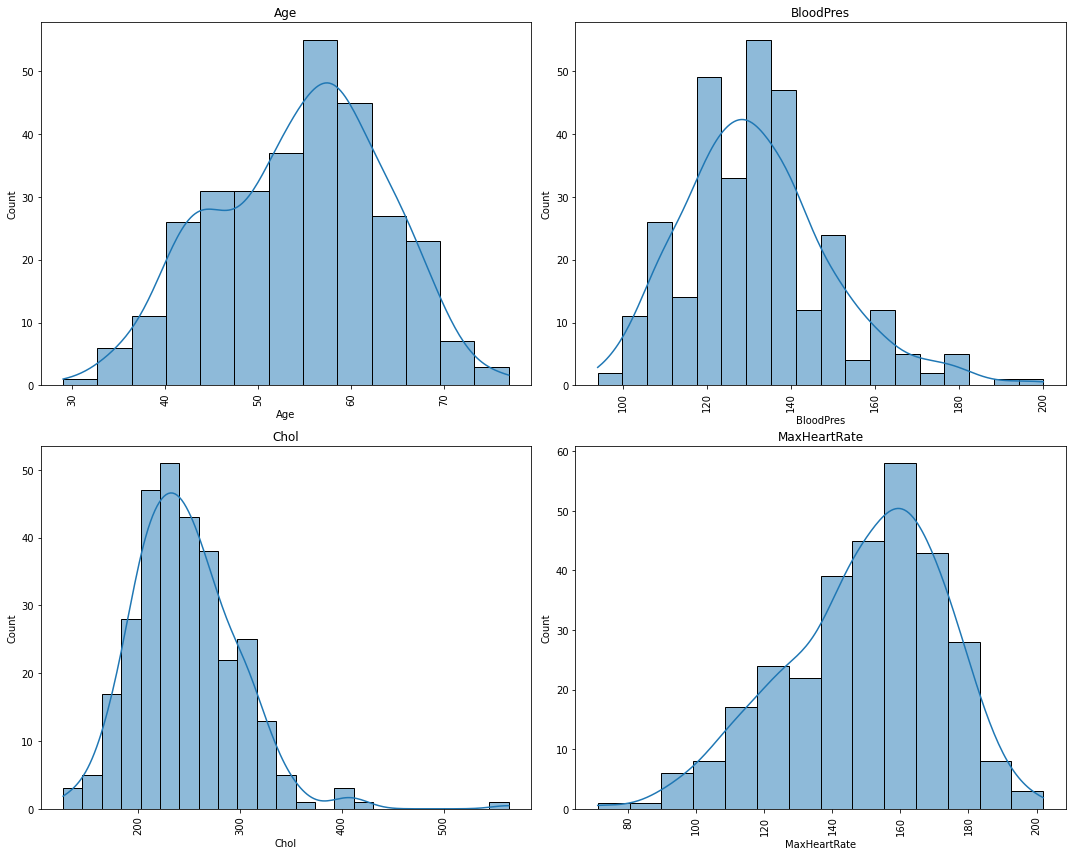

In [148]:
plt.figure(figsize=(15, 12))
for i, j in enumerate(distribution_col):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[j],kde=True)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.title(j)

plt.show()

**Observations**
* Most people are around 55 years old. And the Age distribution is almost normal distribution.
* Slight right skew of Blood pressure distribution, and most people's blood pressure are around 135.
* Right skew of Chol, most data locate around 240.
* Slight left skew of MaxHearRate, most data locate around 160.

#### 1.3 Check Outlier for each continuous data type column.

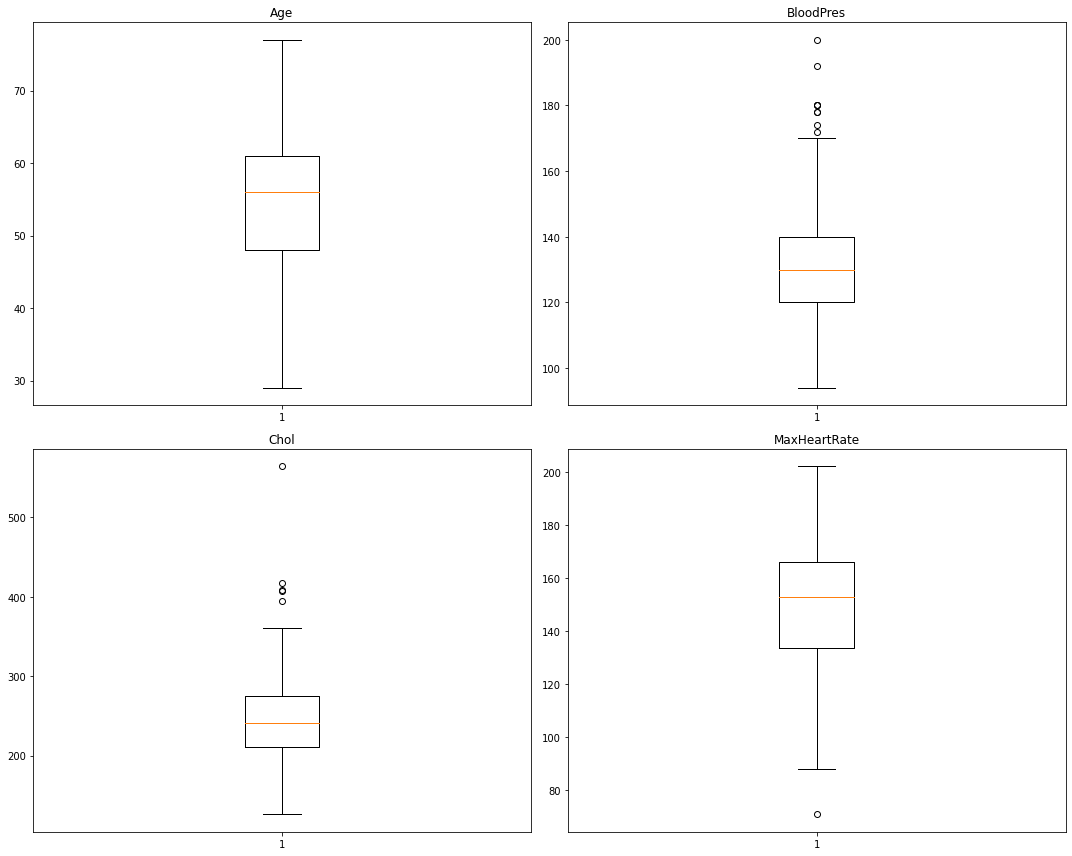

In [149]:
plt.figure(figsize=(15, 12))

for i, j in enumerate(distribution_col):
    plt.subplot(2, 2, i + 1)
    plt.boxplot(df[j], whis=1.5)
    plt.tight_layout()
    plt.title(j)

* There are several outliers in the BloodPress and MaxHeartRate column, but we are going to keep these outliers, because all of them are real data, and based on the histogram above, they are not the matter.

## 2.Bivariate Analysis

#### 2.1 Stack bar to show the relationship between Diagnosis and different categorical variables.

In [150]:
def Mstack_bar(data,b,a):
    sorter = data[a].value_counts().index[-1]
    tabl = pd.crosstab(data[b],data[a], normalize='index').sort_values(
       by=sorter,ascending=False)
    tabl.plot(rot=0,kind="bar", stacked=True,color=['steelblue', 'red'],figsize = (7,5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.figure(figsize=(10, 5))
    plt.show()

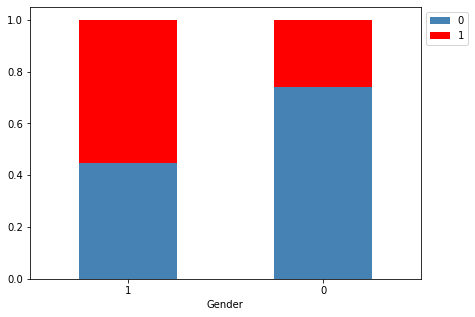

<Figure size 720x360 with 0 Axes>

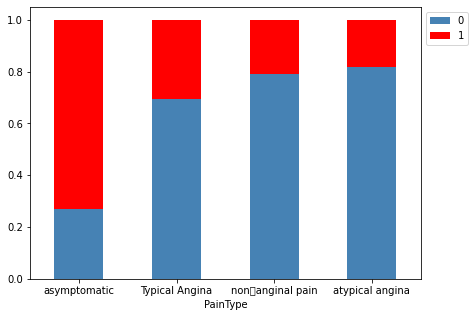

<Figure size 720x360 with 0 Axes>

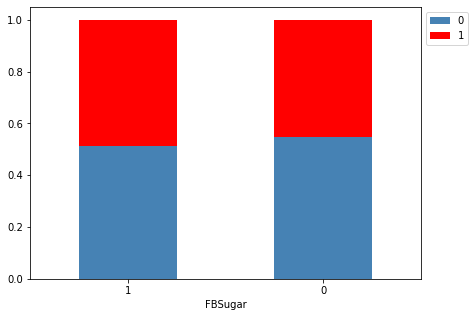

<Figure size 720x360 with 0 Axes>

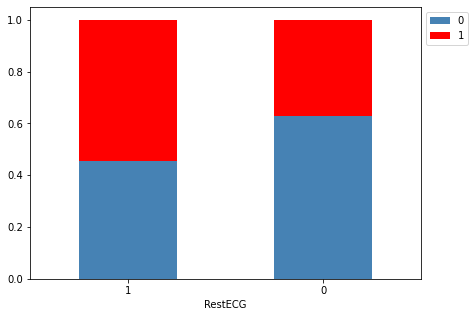

<Figure size 720x360 with 0 Axes>

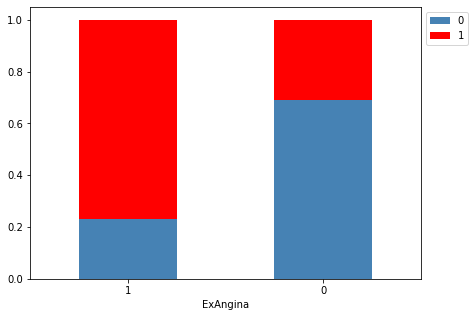

<Figure size 720x360 with 0 Axes>

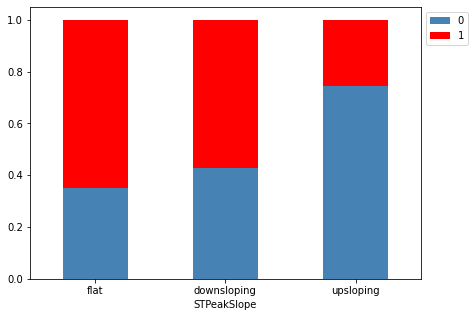

<Figure size 720x360 with 0 Axes>

In [151]:
stack_col = df[['Gender','PainType','FBSugar','RestECG','ExAngina','STPeakSlope']].columns.to_list()
for i in stack_col:
  Mstack_bar(df,i,'Diagnosis')
  

#### 2.2 Heatmap to show the correlation between different numerical variables.

In [152]:
col = df.select_dtypes(include=np.number).columns.tolist()

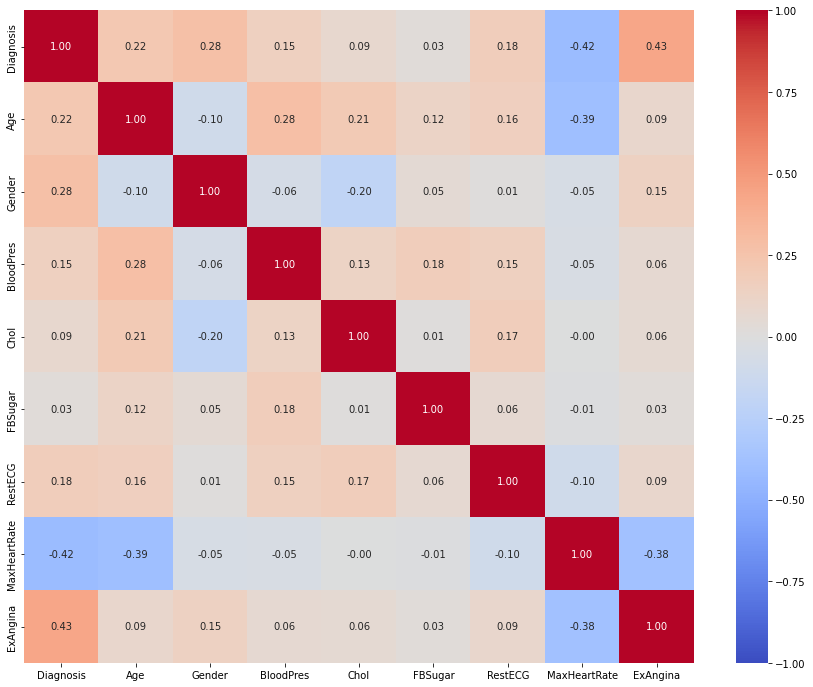

In [153]:
plt.figure(figsize=(15, 12))

sns.heatmap(
    df[col].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="coolwarm"
);

## Data Processing
**After we did EDA before, we need to do the data processing more profoundly.**
* We decided to choose all the columns except STPeakSlope column, this column has three different variables, but one of them: downsloping only has 6% overall, we don't want to overfit our model due to the sparse variable in this column, and due to the heart disease domain knowledge, this attribute is not as important as others in the dataset.
* And in this section, we are going to prepare our data to fit the model, it include data split into train and test dataset etc,.


In [154]:
df_final = df.iloc[:,0:10]
df_final.head()

,Diagnosis,Age,Gender,PainType,BloodPres,Chol,FBSugar,RestECG,MaxHeartRate,ExAngina
0,0,63,1,Typical Angina,145,233,1,1,150,0
1,1,67,1,asymptomatic,160,286,0,1,108,1
2,1,67,1,asymptomatic,120,229,0,1,129,1
3,0,37,1,nonanginal pain,130,250,0,0,187,0
4,0,41,0,atypical angina,130,204,0,1,172,0


#### Preparing data for modeling
* Get dummy variable for categorical data.
* We will split the train and test dataset with the ratio of 8:2, and we also want different values (0 or 1) in the target variable('Diagnosis) that has the same ratio in both the train and test dataset.

In [155]:
final = pd.get_dummies(df_final, drop_first=True)
final

,Diagnosis,Age,Gender,BloodPres,Chol,FBSugar,RestECG,MaxHeartRate,ExAngina,PainType_asymptomatic,PainType_atypical angina,PainType_nonanginal pain
0,0,63,1,145,233,1,1,150,0,0,0,0
1,1,67,1,160,286,0,1,108,1,1,0,0
2,1,67,1,120,229,0,1,129,1,1,0,0
3,0,37,1,130,250,0,0,187,0,0,0,1
4,0,41,0,130,204,0,1,172,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
298,1,45,1,110,264,0,0,132,0,0,0,0
299,1,68,1,144,193,1,0,141,0,1,0,0
300,1,57,1,130,131,0,0,115,1,1,0,0
301,1,57,0,130,236,0,1,174,0,0,1,0


In [156]:
X = final.drop(["Diagnosis"], axis=1)
Y = final["Diagnosis"]

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.20, random_state=1, stratify=Y
)

In [157]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (242, 11)
Shape of test set :  (61, 11)
Percentage of classes in training set:
0    0.541322
1    0.458678
Name: Diagnosis, dtype: float64
Percentage of classes in test set:
0    0.540984
1    0.459016
Name: Diagnosis, dtype: float64


#### Model evaluation criterion

* Before building the model, we need to identify which value should be maximum.

#### The model may make wrong predictions:
* The model predicts that the people has heart disease, but in reality, the people doesn't have heart disease.
* The model predicts that the people doesn't have heart disease, but in reality, the people have heart disease.

#### Which mistake is more important:
* The second is more important.
* If the mistake happens in the second situation, the people will die due to the wrong prediction, because they might not care about their bodies based on the forecast.


#### How to reduce the losses?
* Recall Score can be used to be a important criterion, greater the recall score higher the chance to reduce the wrong.

#### Create functions to calculate different metrics- Accuracy, Recall and Precision and plot the confusion matrix.

In [158]:
def model_performance_classification_sklearn(model, predictors, target):
    
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  
    recall = recall_score(target, pred)  
    precision = precision_score(target, pred)  
    f1 = f1_score(target, pred) 

    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [159]:
def confusion_matrix_sklearn(model, predictors, target):
    
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Building bagging and boosting models

#### 1.Bagging Models

#### 1.1 Decision Tree Model

* In this case, we can pass a dictionary {0:0.54,1:0.46} to the model to specify the weight of each class and the decision tree will give more weightage to class 1.

In [162]:
dtree = DecisionTreeClassifier(criterion='gini',class_weight={0:0.54,1:0.46},random_state=1)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.54, 1: 0.46}, random_state=1)

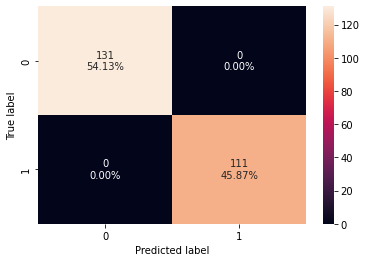

In [163]:
confusion_matrix_sklearn(dtree, X_train, y_train)

In [164]:
dtree_model_train_perf=model_performance_classification_sklearn(dtree, X_train, y_train)
print("Training performance \n",dtree_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


##### Check in test dataset

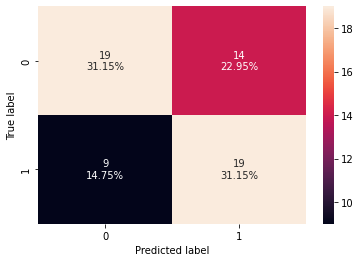

In [165]:
confusion_matrix_sklearn(dtree, X_test, y_test)

In [166]:
dtree_model_test_perf=model_performance_classification_sklearn(dtree, X_test, y_test)
print("Testing performance \n",dtree_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.622951  0.678571   0.575758  0.622951


* Decision tree is working well on the training data but is not able to generalize well on the test data concerning the Recall, it's overfit.

#### 1.2 Bagging Classifier

In [167]:
bagging = BaggingClassifier(random_state=1)
bagging.fit(X_train,y_train)

BaggingClassifier(random_state=1)

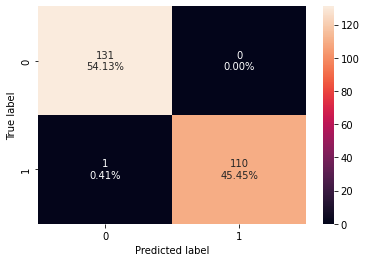

In [168]:
confusion_matrix_sklearn(bagging, X_train, y_train)

In [169]:
bagging_model_train_perf=model_performance_classification_sklearn(bagging, X_train, y_train)
print("Training performance \n",bagging_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.995868  0.990991        1.0  0.995475


##### Check on the test data

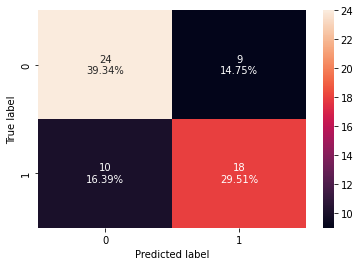

In [170]:
confusion_matrix_sklearn(bagging, X_test, y_test)

In [171]:
bagging_model_test_perf=model_performance_classification_sklearn(bagging, X_test, y_test)
print("Testing performance \n",bagging_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.688525  0.642857   0.666667  0.654545


* Bagging classifier is overfitting on the training set and is performing poorly on the test set in terms of Recall.

#### 1.3 Bagging Classifier with weighted decision tree

In [172]:
bagging_wt = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='gini',class_weight={0:0.54,1:0.46},random_state=1),random_state=1)
bagging_wt.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.54,
                                                                      1: 0.46},
                                                        random_state=1),
                  random_state=1)

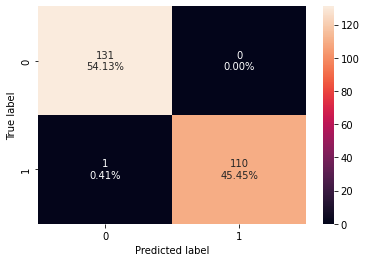

In [173]:
confusion_matrix_sklearn(bagging_wt,X_train,y_train)

In [174]:
bagging_wt_model_train_perf=model_performance_classification_sklearn(bagging_wt,X_train,y_train)
print("Training performance \n",bagging_wt_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.995868  0.990991        1.0  0.995475


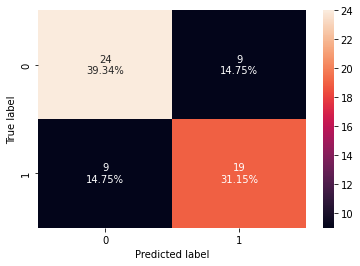

In [175]:
confusion_matrix_sklearn(bagging_wt,X_test,y_test)

In [176]:
bagging_wt_model_test_perf=model_performance_classification_sklearn(bagging_wt, X_test, y_test)
print("Testing performance \n",bagging_wt_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.704918  0.678571   0.678571  0.678571


* Bagging classifier with a weighted decision tree is giving very good accuracy and prediction but is not able to generalize well on test data in terms of Recall. Still overfitting, not improve much.

#### 1.4 Random Forest

In [177]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

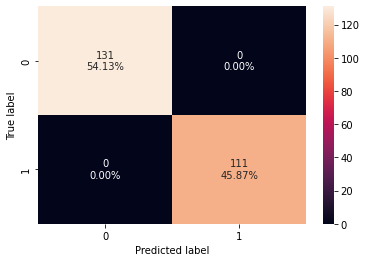

In [178]:
confusion_matrix_sklearn(rf,X_train,y_train)

In [179]:
rf_model_train_perf=model_performance_classification_sklearn(rf,X_train,y_train)
print("Training performance \n",rf_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


* Check on the test dataset

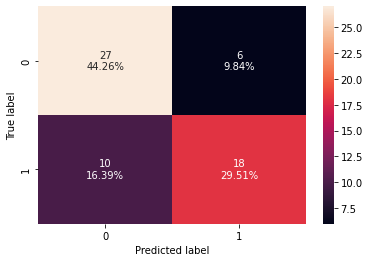

In [180]:
confusion_matrix_sklearn(rf,X_test,y_test)

In [181]:
rf_model_test_perf=model_performance_classification_sklearn(rf,X_test,y_test)
print("Testing performance \n",rf_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.737705  0.642857       0.75  0.692308


* Random Forest has performed well in terms of accuracy, precision, Recall and F1, but it is not able to generalize well on the test data in terms of Recall, still overfitting, but better than the decission tree and decission tree with weight class.

#### 1.5 Random forest with class weights

In [182]:
rf_wt = RandomForestClassifier(class_weight={0:0.54,1:0.46}, random_state=1)
rf_wt.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 0.54, 1: 0.46}, random_state=1)

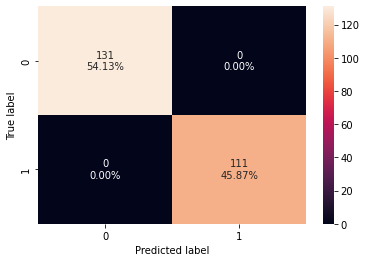

In [183]:
confusion_matrix_sklearn(rf_wt, X_train,y_train)

In [184]:
rf_wt_model_train_perf=model_performance_classification_sklearn(rf_wt, X_train,y_train)
print("Training performance \n",rf_wt_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


* Check on the test dataset

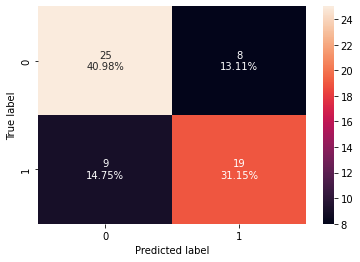

In [185]:
confusion_matrix_sklearn(rf_wt, X_test,y_test)

In [186]:
rf_wt_model_test_perf=model_performance_classification_sklearn(rf_wt, X_test,y_test)
print("Testing performance \n",rf_wt_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.721311  0.678571   0.703704  0.690909


* There is not much improvement in metrics of weighted random forest as compared to the unweighted random forest.

#### 2.Boosting Model

#### 2.1 AdaBoost Classifier

In [187]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

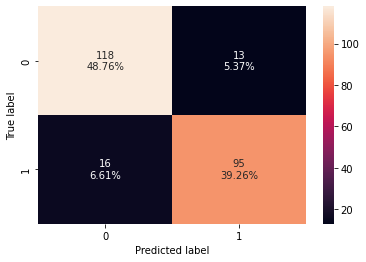

In [188]:
confusion_matrix_sklearn(abc, X_train,y_train)

In [189]:
abc_model_train_perf=model_performance_classification_sklearn(abc, X_train,y_train)
print("Training performance \n",abc_model_train_perf)

Training performance 
    Accuracy    Recall  Precision       F1
0  0.880165  0.855856    0.87963  0.86758


* Check on the test dataset

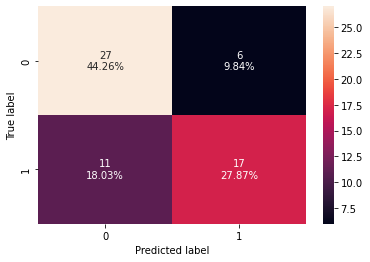

In [190]:
confusion_matrix_sklearn(abc, X_test,y_test)

In [191]:
abc_model_test_perf=model_performance_classification_sklearn(abc, X_test,y_test)
print("Testing performance \n",abc_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.721311  0.607143    0.73913  0.666667


* It's not as overfit as before, but the recall score still low. 

#### 2.2 Gradient Boosting Classifier

In [192]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

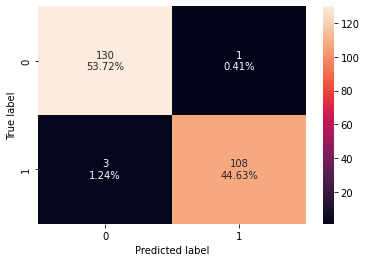

In [193]:
confusion_matrix_sklearn(gbc, X_train,y_train)

In [194]:
gbc_model_train_perf=model_performance_classification_sklearn(gbc, X_train,y_train)
print("Training performance \n",gbc_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.983471  0.972973   0.990826  0.981818


* Check on the test dataset

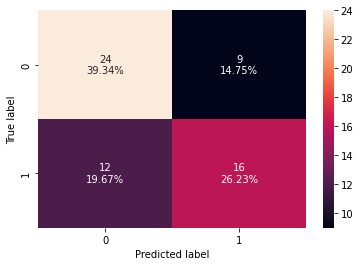

In [195]:
confusion_matrix_sklearn(gbc, X_test,y_test)

In [196]:
gbc_model_test_perf=model_performance_classification_sklearn(gbc, X_test,y_test)
print("Testing performance \n",gbc_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.655738  0.571429       0.64  0.603774


* Overfit, and Recall even lower than before

#### 3. Tuning Models

#### 3.1 Tuning Decision Tree

In [199]:
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.54,1:0.46},random_state=1)

parameters = {'max_depth': np.arange(2,30), 
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

scorer = metrics.make_scorer(metrics.recall_score)

grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer)
grid_obj = grid_obj.fit(X_train, y_train)

dtree_tuned = grid_obj.best_estimator_

dtree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.54, 1: 0.46}, max_depth=2,
                       max_leaf_nodes=2, min_impurity_decrease=0.0001,
                       random_state=1)

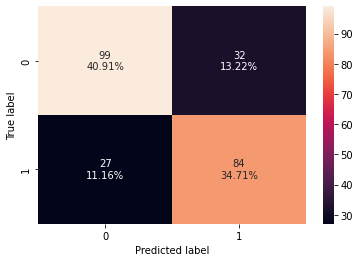

In [200]:
confusion_matrix_sklearn(dtree_tuned, X_train,y_train)

In [201]:
dtree_tuned_model_train_perf=model_performance_classification_sklearn(dtree_tuned, X_train,y_train)
print("Training performance \n",dtree_tuned_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.756198  0.756757   0.724138  0.740088


#### Check on the test dataset

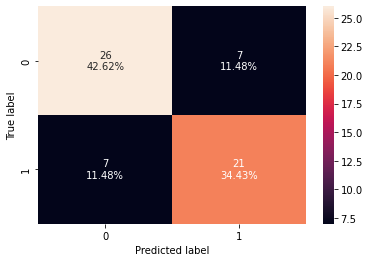

In [202]:
confusion_matrix_sklearn(dtree_tuned, X_test,y_test)

In [203]:
dtree_tuned_model_test_perf=model_performance_classification_sklearn(dtree_tuned, X_test, y_test)
print("Testing performance \n",dtree_tuned_model_test_perf)

Testing performance 
    Accuracy  Recall  Precision    F1
0  0.770492    0.75       0.75  0.75


* Make some improvements here, reduced overfitting, but recall is a little bit lower.

#### 3.2 Tuning Bagging Classifier

In [204]:
cl1 = DecisionTreeClassifier(class_weight={0:0.54,1:0.46},random_state=1)
param_grid = {'base_estimator':[cl1],
              'max_features': [0.7,0.8,0.9,1],
              'max_samples': [0.7,0.8,0.9,1], 
              'n_estimators' : [10,20,30,40,50],
             }

grid = GridSearchCV(BaggingClassifier(random_state=1,bootstrap=True), param_grid=param_grid, scoring = 'recall', cv = 5)
grid.fit(X_train, y_train)

bagging_tuned  = grid.best_estimator_
bagging_tuned.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.54,
                                                                      1: 0.46},
                                                        random_state=1),
                  max_features=0.7, max_samples=0.7, n_estimators=30,
                  random_state=1)

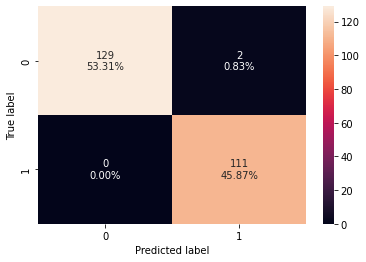

In [205]:
confusion_matrix_sklearn(bagging_tuned, X_train,y_train)

In [206]:
bagging_tuned_model_train_perf=model_performance_classification_sklearn(bagging_tuned, X_train,y_train)
print("Training performance \n",bagging_tuned_model_train_perf)

Training performance 
    Accuracy  Recall  Precision        F1
0  0.991736     1.0   0.982301  0.991071


#### Check on the test dataset

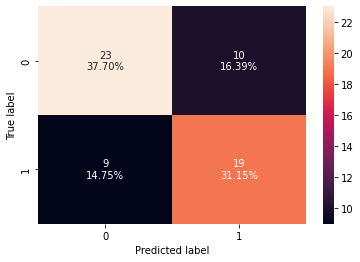

In [207]:
confusion_matrix_sklearn(bagging_tuned, X_test,y_test)

In [208]:
bagging_tuned_model_test_perf=model_performance_classification_sklearn(bagging_tuned, X_test, y_test)
print("Testing performance \n",bagging_tuned_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.688525  0.678571   0.655172  0.666667


* Even lower

#### 3.3 Tuning Random Forest

In [209]:
rf_estimator = RandomForestClassifier(random_state=1)

parameters = {  
        "n_estimators": [110,251,501],
        "min_samples_leaf": np.arange(5, 10),
        "max_features": [0.2, 0.7, 0.1],
        "max_samples": np.arange(0.3, 0.7, 0.1),
}

grid_obj = GridSearchCV(rf_estimator, parameters, scoring='recall',cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

rf_tuned = grid_obj.best_estimator_

rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_features=0.2, max_samples=0.4, min_samples_leaf=5,
                       n_estimators=110, random_state=1)

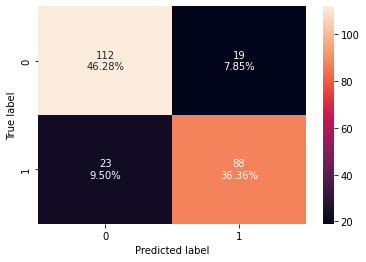

In [210]:
confusion_matrix_sklearn(rf_tuned, X_train,y_train)

In [211]:
rf_tuned_model_train_perf=model_performance_classification_sklearn(rf_tuned, X_train,y_train)
print("Training performance \n",rf_tuned_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.826446  0.792793    0.82243  0.807339


* Check on the test data

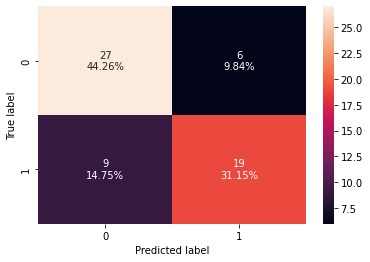

In [212]:
confusion_matrix_sklearn(rf_tuned, X_test,y_test)

In [213]:
rf_tuned_model_test_perf=model_performance_classification_sklearn(rf_tuned, X_test, y_test)
print("Testing performance \n",rf_tuned_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.754098  0.678571       0.76  0.716981


* Test dataset is too small, recall is still very low

#### 3.4 Tuning AdaBoosting Classifier

In [214]:
abc_tuned = AdaBoostClassifier(random_state=1)

parameters = {
              'n_estimators': np.arange(10,100,10), 
              'learning_rate': [1, 0.1, 0.5, 0.01]
}

acc_scorer = metrics.make_scorer(metrics.recall_score)

grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

abc_tuned = grid_obj.best_estimator_

abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=1, n_estimators=20, random_state=1)

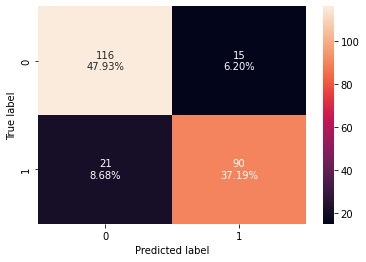

In [215]:
confusion_matrix_sklearn(abc_tuned, X_train,y_train)

In [216]:
abc_tuned_model_train_perf=model_performance_classification_sklearn(abc_tuned, X_train,y_train)
print("Training performance \n",abc_tuned_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0   0.85124  0.810811   0.857143  0.833333


* Check on the test dataset

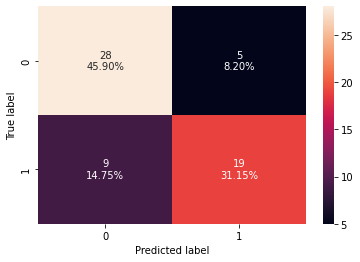

In [217]:
confusion_matrix_sklearn(abc_tuned, X_test,y_test)

In [218]:
abc_tuned_model_test_perf=model_performance_classification_sklearn(abc_tuned, X_test, y_test)
print("Testing performance \n",abc_tuned_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.770492  0.678571   0.791667  0.730769


* Still low

#### 3.5 Tuning Gradient Boosting Classifier

In [219]:
gbc_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

parameters = {
    "n_estimators": [200, 250],
    "subsample": [0.9, 1],
    "max_features": [0.8, 0.9],
    "learning_rate": np.arange(0.1, 0.21, 0.1),
}

acc_scorer = metrics.make_scorer(metrics.recall_score)

grid_obj = GridSearchCV(gbc_tuned, parameters, scoring='recall',cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

gbc_tuned = grid_obj.best_estimator_

gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.8, n_estimators=200, random_state=1,
                           subsample=0.9)

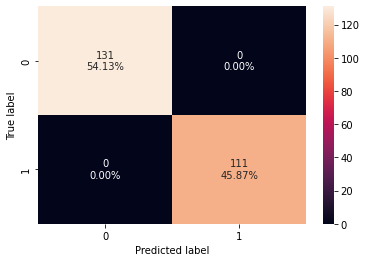

In [220]:
confusion_matrix_sklearn(gbc_tuned, X_train,y_train)

In [221]:
gbc_tuned_model_train_perf=model_performance_classification_sklearn(gbc_tuned, X_train,y_train)
print("Training performance \n",gbc_tuned_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


* Check on the test dataset

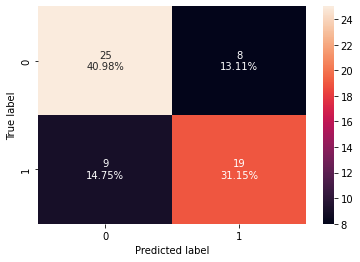

In [222]:
confusion_matrix_sklearn(gbc_tuned, X_test,y_test)

In [223]:
gbc_tuned_model_test_perf=model_performance_classification_sklearn(gbc_tuned, X_test, y_test)
print("Testing performance \n",gbc_tuned_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.721311  0.678571   0.703704  0.690909


* Overfitting and low recall score in test dataset

#### 3.6 Stacking Model

In [226]:
estimators=[('Random Forest', rf_tuned),('Decision Tree', dtree_tuned),
           ('Gradient Boosting', gbc_tuned),('AdaBoosting', abc_tuned)]
final_estimator=XGBClassifier(random_state=1)

In [227]:
stacking_model=StackingClassifier(estimators=estimators, final_estimator=final_estimator,cv=5)
stacking_model.fit(X_train,y_train)

StackingClassifier(cv=5,
                   estimators=[('Random Forest',
                                RandomForestClassifier(max_features=0.2,
                                                       max_samples=0.4,
                                                       min_samples_leaf=5,
                                                       n_estimators=110,
                                                       random_state=1)),
                               ('Decision Tree',
                                DecisionTreeClassifier(class_weight={0: 0.54,
                                                                     1: 0.46},
                                                       max_depth=2,
                                                       max_leaf_nodes=2,
                                                       min_impurity_decrease=0.0001,
                                                       random_state=1)),
                               ('Gradient Boosting',
  

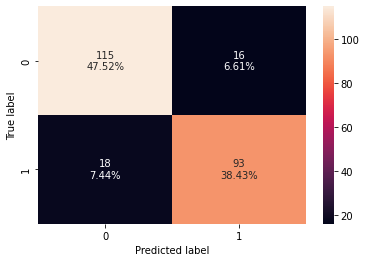

In [228]:
confusion_matrix_sklearn(stacking_model, X_train,y_train)

In [229]:
stacking_model_train_perf=model_performance_classification_sklearn(stacking_model, X_train,y_train)
print("Training performance \n",stacking_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.859504  0.837838   0.853211  0.845455


* Check on the test dataset

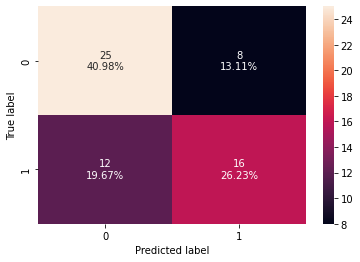

In [230]:
confusion_matrix_sklearn(stacking_model, X_test,y_test)

In [231]:
stacking_model_test_perf=model_performance_classification_sklearn(stacking_model, X_test, y_test)
print("Testing performance \n",stacking_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.672131  0.571429   0.666667  0.615385


* The result doesn't performance good, we think the reason is the dataset is too small?

#### Model Performance Comparison and Conclusions

In [232]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
dtree_model_train_perf.T,
bagging_model_train_perf.T,
bagging_wt_model_train_perf.T,
rf_model_train_perf.T,
rf_wt_model_train_perf.T,
abc_model_train_perf.T,
gbc_model_train_perf.T,
dtree_tuned_model_train_perf.T,
bagging_tuned_model_train_perf.T,
rf_tuned_model_train_perf.T,
abc_tuned_model_train_perf.T,
gbc_tuned_model_train_perf.T,
stacking_model_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree without weight class",
    "Bagging model without tweak",
    "Bagging model with weight class",
    "Random Forest without weight class",
    "Random Forest with weight class",
    "AdaBoosting without tweak",
    "Gradient Boosting without tweak",
    "Decision Tree tuned",
    "Bagging tuned",
    "Random Forest tuned",
    "AdaBoosting with tuned",
    "Gradient Boosting with tuned",
    "Stacking Model",
]

In [233]:
# test performance comparison
models_test_comp_df = pd.concat(
    [
        dtree_model_test_perf.T,
        bagging_model_test_perf.T,
        bagging_wt_model_test_perf.T,
        rf_model_test_perf.T,
        rf_wt_model_test_perf.T,
        abc_model_test_perf.T,
        gbc_model_test_perf.T,
        dtree_tuned_model_test_perf.T,
        bagging_tuned_model_test_perf.T,
        rf_tuned_model_test_perf.T,
        abc_tuned_model_test_perf.T,
        gbc_tuned_model_test_perf.T,
        stacking_model_test_perf.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree without weight class",
    "Bagging model without tweak",
    "Bagging model with weight class",
    "Random Forest without weight class",
    "Random Forest with weight class",
    "AdaBoosting without tweak",
    "Gradient Boosting without tweak",
    "Decision Tree tuned",
    "Bagging tuned",
    "Random Forest tuned",
    "AdaBoosting with tuned",
    "Gradient Boosting with tuned",
    "Stacking Model",
]

In [234]:
models_train_comp_df

,Decision Tree without weight class,Bagging model without tweak,Bagging model with weight class,Random Forest without weight class,Random Forest with weight class,AdaBoosting without tweak,Gradient Boosting without tweak,Decision Tree tuned,Bagging tuned,Random Forest tuned,AdaBoosting with tuned,Gradient Boosting with tuned,Stacking Model
Accuracy,1.0,0.995868,0.995868,1.0,1.0,0.880165,0.983471,0.756198,0.991736,0.826446,0.851240,1.0,0.859504
Recall,1.0,0.990991,0.990991,1.0,1.0,0.855856,0.972973,0.756757,1.000000,0.792793,0.810811,1.0,0.837838
Precision,1.0,1.000000,1.000000,1.0,1.0,0.879630,0.990826,0.724138,0.982301,0.822430,0.857143,1.0,0.853211
F1,1.0,0.995475,0.995475,1.0,1.0,0.867580,0.981818,0.740088,0.991071,0.807339,0.833333,1.0,0.845455


In [235]:
models_test_comp_df

,Decision Tree without weight class,Bagging model without tweak,Bagging model with weight class,Random Forest without weight class,Random Forest with weight class,AdaBoosting without tweak,Gradient Boosting without tweak,Decision Tree tuned,Bagging tuned,Random Forest tuned,AdaBoosting with tuned,Gradient Boosting with tuned,Stacking Model
Accuracy,0.622951,0.688525,0.704918,0.737705,0.721311,0.721311,0.655738,0.770492,0.688525,0.754098,0.770492,0.721311,0.672131
Recall,0.678571,0.642857,0.678571,0.642857,0.678571,0.607143,0.571429,0.750000,0.678571,0.678571,0.678571,0.678571,0.571429
Precision,0.575758,0.666667,0.678571,0.750000,0.703704,0.739130,0.640000,0.750000,0.655172,0.760000,0.791667,0.703704,0.666667
F1,0.622951,0.654545,0.678571,0.692308,0.690909,0.666667,0.603774,0.750000,0.666667,0.716981,0.730769,0.690909,0.615385


### Let's check the importance of each feature in the Gradient Boosting with tuned model.

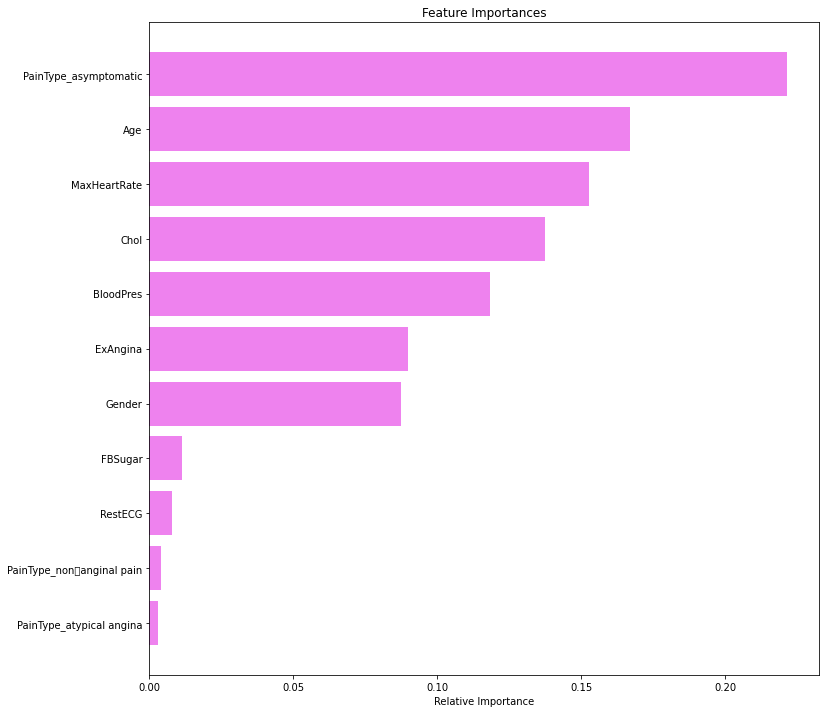

In [236]:
feature_names = X_train.columns
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Summary
- All in all, the model that we got the highest recall score and not overfitted in the training data is the model that tuned for decision tree, the recall score in the test dataset is 0.75.
- We are not sure why the recall, accuracy, f1, and precision score is even lower in the stacking model, maybe because of the small data size or because our feature engineering was insufficient.
- From above feature importances, we can notice that Asymptomatic type of pain are the most import feature that can be caused heart disease, followed by Age and MaxHeartRate.

---